In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm, skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
plt.style.use('seaborn')

In [354]:
train = pd.read_csv('database/train.csv', index_col=0)
test = pd.read_csv('database/test.csv', index_col=0)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Outliers

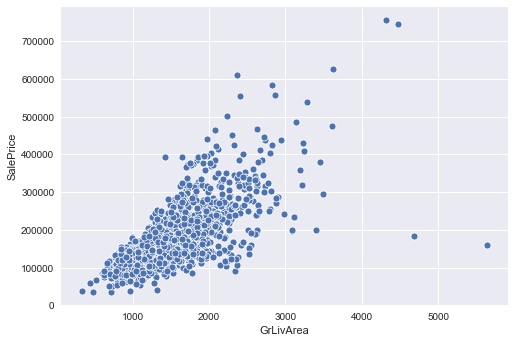

In [355]:
sns.scatterplot(train['GrLivArea'], train[tar])

In [356]:
# The 2 bottom right points are outliers, with high area at very low price.
# We'll just remove those two samples from the dataset

ids = [524, 1299]

train.drop(ids, axis=0, inplace=True)

## Analyzing the Target Feature

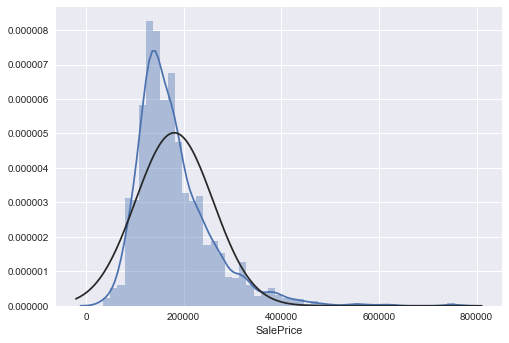

In [357]:
tar = 'SalePrice'

sns.distplot(train[tar], fit=norm)

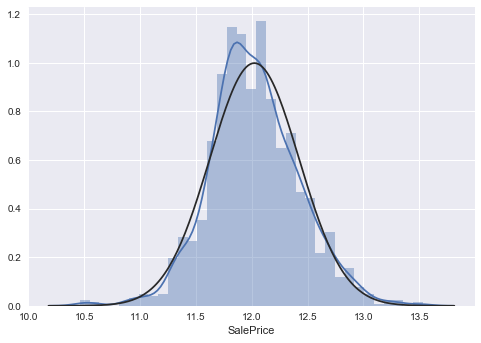

In [358]:
# As it is positively skewed, let's simply apply Log Transformation

train[tar] = np.log(train[tar])

sns.distplot(train[tar], fit=norm)

## Merging

Merging our train and test set.

In [359]:
number_of_train_samples = train.shape[0]
number_of_test_samples  = test.shape[0]

y_train = train[tar]
data    = pd.concat([train, test])

data.drop(tar, axis=1, inplace=True)

print(data.shape)

data.sample(5)

(2917, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
301,190,RL,90.0,15750,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2fmCon,1Story,5,5,1953,1953,Hip,CompShg,MetalSd,MetalSd,BrkFace,56.0,TA,TA,CBlock,TA,TA,Mn,BLQ,841.0,Unf,0.0,324.0,1165.0,GasA,TA,Y,SBrkr,1336,0,0,1336,1.0,0.0,1,0,2,1,TA,5,Typ,2,Gd,Attchd,1953.0,Unf,1.0,375.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1028,20,RL,71.0,9520,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,338.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1513.0,Unf,0.0,125.0,1638.0,GasA,Ex,Y,SBrkr,1646,0,0,1646,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3.0,800.0,TA,TA,Y,192,44,0,0,0,0,NaN,NaN,NaN,0,4,2008,New,Partial
2045,20,RL,NaN,15387,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,7,1967,1967,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,603.0,BLQ,294.0,723.0,1620.0,GasA,Ex,Y,SBrkr,1620,0,0,1620,0.0,0.0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1967.0,Unf,2.0,578.0,TA,TA,Y,0,62,192,0,0,0,NaN,NaN,Shed,450,8,2008,WD,Normal
426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,8,1946,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,651.0,651.0,GasA,Gd,Y,SBrkr,707,682,0,1389,0.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Detchd,1947.0,Unf,1.0,240.0,TA,TA,P,0,0,126,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal


Converting the Categorical Features hidden in the form of numerical features...

Yes, I'm talking about you, idiotss!

* MSSubClass
* OverallQual
* OverallCond
* YearBuilt
* YearRemodAdd
* BsmtFullBath
* BsmtHalfBath
* FullBath
* HalfBath
* GarageYrBlt
* GarageCars
* YrSold

In [360]:
# idiots = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'GarageYrBlt', 'GarageCars', 'YrSold']
# for f in idiots:
#     data[f] = data[f].astype(str)

## Correlation

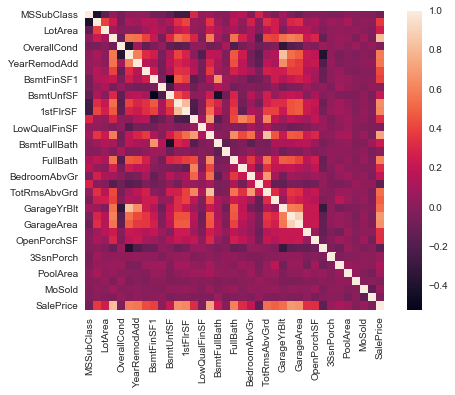

In [361]:
corr_map = train.corr()
# corr_map.sort_values(tar, ascending=False, inplace=True, axis=1)
# corr_map.sort_values(tar, ascending=False, inplace=True, axis=0)

sns.heatmap(corr_map, square=True)

#### Top Correlators

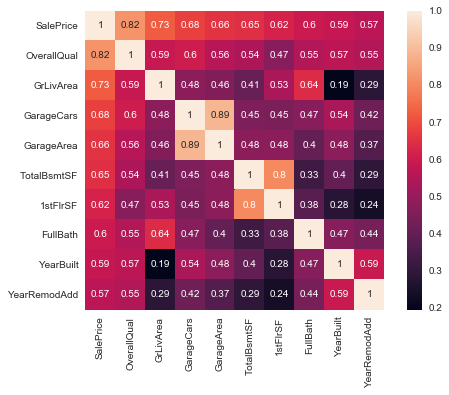

In [362]:
top_features = corr_map.sort_values(tar, ascending=False, axis=0)[:10].index
top_features
top_corr     = train[top_features].corr()
# # top_corr

sns.heatmap(top_corr, square=True, annot=True)

## NAN Values

Text(0, 0.5, 'nan Percentage')

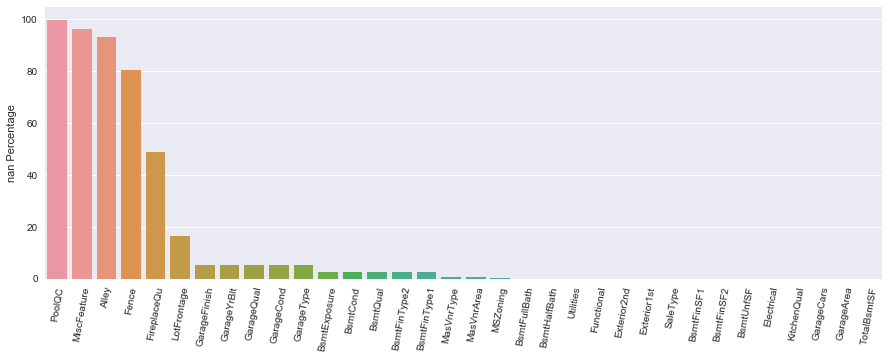

In [363]:
nan_percent  = round((data.isnull().sum()/len(data)) * 100, 2)

nan_features = nan_percent.drop(nan_percent[nan_percent==0].index).sort_values(ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x=nan_features.index, y=nan_features)
plt.xticks(rotation=80)
plt.ylabel('nan Percentage')

#### Filling 'em up!

*We impute them by proceeding sequentially through features with missing values*

In [364]:
'''
Credits: Serigne
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
'''

# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
data["PoolQC"] = data["PoolQC"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
data["MiscFeature"] = data["MiscFeature"].fillna("None")

# Alley : data description says NA means "no alley access"
data["Alley"] = data["Alley"].fillna("None")

# Fence : data description says NA means "no fence"
data["Fence"] = data["Fence"].fillna("None")

# FireplaceQu : data description says NA means "no fireplace"
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")

# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
data = data.drop(['Utilities'], axis=1)

# Functional : data description says NA means typical
data["Functional"] = data["Functional"].fillna("Typ")

# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD"
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data

# MSSubClass : Na most likely means No building class. We can replace missing values with None
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [365]:
print('Remaining nan values:', data.isnull().sum().sum())

Remaining nan values: 0


In [366]:
cat_features = [f for f in data.columns if data[f].dtype == 'O']
num_features = [f for f in data.columns if data[f].dtype != 'O']

print('Total number of categorical features:', len(cat_features))
print('Total number of numerical features  :', len(num_features))

Total number of categorical features: 42
Total number of numerical features  : 36


## Label Encoding

In [367]:
enc = LabelEncoder()

for f in cat_features:
    data[f] = enc.fit_transform(data[f])

data[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,3,3,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4
2,3,1,1,3,3,2,0,24,1,2,0,2,1,0,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4
4,3,1,1,0,3,0,0,6,2,2,0,5,1,0,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0
5,3,1,1,0,3,2,0,15,2,2,0,5,1,0,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4


# *TRY ADDING ONE MORE FEATURE IF NOT GOOD ACCURACY*

## Normalizing

In [368]:
skewed_feats = data[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewness = skewness.loc[(skewness>0.75).index]
skewness


,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [369]:
lambda_ = 0.15
for f in skewness.index:
    data[f] = boxcox1p(data[f], lambda_)

In [370]:
data['MiscVal'].skew()

5.597842049263943

### Creating Dummy Cat Features

In [371]:
pd.get_dummies(data, drop_first=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.684507,3,5.831328,19.212182,1,1,3,3,4,0,5,2,2,0,5,2.440268,2.055642,14.187527,14.187527,1,0,12,13,1,8.059126,2,4,2,2,4,3,2,11.170327,6,0.0,7.483296,11.692623,1,0,1,4,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,2,2.602594,6,0.000000,3,1,14.187527,2,1.194318,10.506271,5,5,2,0.000000,5.714669,0.000000,0.0,0.0,0.0,3,4,1,0.000000,1.194318,14.195323,8,4
2,3.858807,3,6.221214,19.712205,1,1,3,3,2,0,24,1,2,0,2,2.259674,2.602594,14.145138,14.145138,1,0,8,8,2,0.000000,3,4,1,2,4,1,0,12.062832,6,0.0,8.897844,12.792276,1,0,1,4,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,3,2.259674,6,0.730463,5,1,14.145138,2,1.194318,10.062098,5,5,2,9.010206,0.000000,0.000000,0.0,0.0,0.0,3,4,1,0.000000,2.055642,14.193765,8,4
3,5.684507,3,5.914940,20.347241,1,1,0,3,4,0,5,2,2,0,5,2.440268,2.055642,14.184404,14.185966,1,0,12,13,1,7.646538,2,4,2,2,4,2,2,10.200343,6,0.0,9.917060,11.892039,1,0,1,4,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,2,2.259674,6,0.730463,5,1,14.184404,2,1.194318,10.775536,5,5,2,0.000000,5.053371,0.000000,0.0,0.0,0.0,3,4,1,0.000000,2.750250,14.195323,8,4
4,5.968981,3,5.684507,19.691553,1,1,0,3,0,0,6,2,2,0,5,2.440268,2.055642,14.047529,14.135652,1,0,13,15,2,0.000000,3,4,0,4,1,3,0,8.274266,6,0.0,10.468500,11.354094,1,2,1,4,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,2,2.440268,6,0.730463,2,5,14.179714,3,1.540963,10.918253,5,5,2,0.000000,4.745132,8.797736,0.0,0.0,0.0,3,4,1,0.000000,1.194318,14.192207,8,0
5,5.684507,3,6.314735,21.325160,1,1,0,3,2,0,15,2,2,0,5,2.602594,2.055642,14.182841,14.182841,1,0,12,13,1,9.391827,2,4,2,2,4,0,2,10.971129,6,0.0,10.221051,12.510588,1,0,1,4,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,2,2.750250,6,0.730463,5,1,14.182841,2,1.540963,11.627708,5,5,2,8.013884,6.314735,0.000000,0.0,0.0,0.0,3,4,1,0.000000,3.128239,14.195323,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.620056,4,3.932510,14.081426,1,1,3,3,4,0,10,2,2,3,5,1.820334,2.440268,14.135652,14.135652,1,0,5,5,2,0.000000,3,4,1,4,4,3,6,0.000000,6,0.0,10.496872,10.496872,1,2,1,4,10.496872,10.496872,0.0,12.374860,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,3,2.055642,6,0.000000,3,6,0.000000,1,0.000000,0.000000,3,3,2,0.000000,0.000000,0.000000,0.0,0.0,0.0,3,4,1,0.000000,2.259674,14.192207,8,4
2916,7.620056,4,3.932510,14.013314,1,1,3,3,4,0,10,2,2,4,5,1.820334,2.055642,14.135652,14.135652,1,0,5,5,2,0.000000,3,4,1,4,4,3,5,8.622254,6,0.0,8.978567,10.496872,1,4,1,4,10.496872,10.496872,0.0,12.374860,0.000000,0.000000,0.730463,0.730463,1.540963,0.730463,3,2.259674,6,0.000000,3,4,14.135652,3,0.730463,8.914179,5,5,2,0.000000,4.137711,0.000000,0.0,0.0,0.0,3,4,1,0.000000,1.82033

# *DUMMY VARIABLES..? REALLY?*

# **MODEL**

In [372]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

In [396]:
# The new train and test dfs

train = data[:number_of_train_samples]
test  = data[number_of_train_samples:]

# y_train has been defined earlier

#### Defining Validation Function

In [430]:
#Validation function
N_FOLDS = 2

def get_score(model):
    kf = KFold(N_FOLDS, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


## Base Models

In [398]:
# Specially using RobustScaler, because it does not take the outliers under consideration much while scaling but 25 and 75 percentile.

lasso = make_pipeline(RobustScaler(), 
                      Lasso(alpha=0.0005, random_state=1))

In [399]:
lasso

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=1, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [400]:
elastic_net  = make_pipeline(RobustScaler(), 
                            ElasticNet(l1_ratio=0.9, alpha=0.0005, random_state=2))

In [401]:
kernel_ridge = make_pipeline(RobustScaler(), 
                             KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5))

In [402]:
gboost = GradientBoostingRegressor(random_state=3)

### Base Model Scores

In [421]:
def create_submission_file(preds):
    df              = pd.DataFrame()
    df['Id']        = range(1461, 2920)
    df['SalePrice'] = preds

    df.to_csv('database/predictions.csv', index=False)

